# 4.  La mesure

PennyLane peut extraire différents types de [résultats de mesures](https://docs.pennylane.ai/en/stable/introduction/measurements.html) à partir d'une machine quantique : la valeur moyenne d'une observable, sa variance, des échantillons d'une mesure unique ou des probabilités d'état de base de calcul.

On retrouve les différentes fonctions de mesures telles que

*   `qml.expval()`
*   `qml.var()`
*   `qml.sample()`
*   `qml.counts()` 
*   `qml.probs()`
*   `qml.density_matrix()`


Comme mentionné précédement, on peut aussi retourner l'état dans la base de calcul avec `qml.state()`. Attention cela ne marche que sur simulateur.

Sur du matériel quantique, on utilise `qml.counts()` et `qml.sample()`.

## Valeur moyenne et variance d'un observable

In [ ]:
import pennylane as qml
from pennylane import numpy as np

from grader import *

In [ ]:
dev = qml.device('default.qubit', wires=2)
@qml.qnode(dev)
def circuit_expval(theta):
    qml.RX(theta, wires=0)
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliY(0))

Nous retournons ici la valeur moyenne `qml.expval()` de l'opérateur $Y$ appliqué au premier qubit. Plus précisément, cela signifie que nous calculons $\langle \psi \vert Y \vert \psi \rangle$, où $\vert \psi \rangle$ est le vecteur de dimension $2^n$ généré par le circuit ($n$ étant le nombre de qubits) et $Y$ est un opérateur qui agit uniquement sur le premier qubit. Lorsque nous exécutons le circuit pour $\theta=0.5$, nous obtenons un nombre qui correspond exactement à cette valeur moyenne en sortie.

In [ ]:
circuit_expval(0.5)

Nous pouvons également retourner la variance d'une observable, `qml.var()`

In [ ]:
@qml.qnode(dev)
def circuit_var(theta):
    qml.RX(theta, wires=0)
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.var(qml.PauliY(0))

circuit_var(0.5)

## Échantillons et probabilités

En réalité, dans une expérience, nous obtenons généralement un ensemble de mesures réelles échantillonnées à partir des probabilités de la fonction d'onde. Dans ce cas, la fonction d'onde réelle n'est pas accessible, mais encore une fois, nous pouvons "tricher" car nous simulons notre circuit de manière classique.

Ainsi, si nous voulons imiter un ordinateur quantique, nous pouvons sortir un ensemble de mesures à partir de l'état résultant. Pour ce faire, nous utilisons la fonction `qml.sample()`, pour laquelle nous devons spécifier le nombre d'échantillons ('shots') lors de la définition de la machine.

In [ ]:
dev = qml.device("default.qubit", wires=2, shots=4)
@qml.qnode(dev)
def circuit_sample(theta):
    qml.RX(theta, wires=0)
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.sample(qml.PauliY(0))

circuit_sample(0.5)


Ici, PennyLane prend les valeurs propres λᵢ de l'observable et les échantillonne avec leurs probabilités associées p(λᵢ) = |⟨ξᵢ|ψ⟩|², où, |ξᵢ⟩ est l'état de base correspondant dans la base de l'observable.

Rappel: Pauli-Y = $\begin{pmatrix}
0 & -i \\
i & 0
\end{pmatrix}$ et les valeurs propres associées sont $\pm 1$.

Les vecteurs propres sont ainsi $\frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ i \end{pmatrix}$ et $\frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ -i \end{pmatrix}$ pour $\pm 1 $ respectivement.



Au lieu d'échantillonner à partir de la densité de probabilité de la fonction d'onde, nous pourrions être intéressés par l'obtention directe des probabilités de chaque état de la base de calcul. PennyLane nous permet de faire cela en utilisant la fonction `qml.probs()`.

In [ ]:
from print_latex import print_state_vector

dev = qml.device("default.qubit", wires=2)
@qml.qnode(dev)
def circuit_probs(theta):
    qml.RX(theta, wires=0)
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.probs(wires=[0, 1])
print_state_vector(circuit_probs(0.5))


Nous obtenons des probabilités d'observation d'environ 47% pour les états |00⟩ et |01⟩ et 3% pour les états |10⟩ et |11⟩.

---



## État d'un qubit



In [ ]:
dev = qml.device('default.qubit', wires = 2)
@qml.qnode(dev)
def circuit_state(theta):
    qml.RX(theta, wires=0)
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.state()


print_state_vector(circuit_state(0.5))

---

## Résumé

Reprenons l'exemple de l'état de Bell vu dans les sections précèdentes.
$$\vert\psi_+ \rangle = \frac{1}{\sqrt{2}}(\vert 00 \rangle + \vert 11 \rangle$$


In [ ]:
def bell():
    qml.Hadamard(0)
    qml.CNOT([0,1])


In [ ]:
dev = qml.device('default.qubit',wires = 2)
@qml.qnode(dev)
def bell_statevector():
    bell()
    return qml.state()


print_state_vector(bell_statevector())

In [ ]:
fig, ax  = qml.draw_mpl(bell_statevector)()

In [ ]:
# Je peux afficher la matrice unitaire du circuit H CNOT 

qml.matrix(bell_statevector)()

In [ ]:
@qml.qnode(dev)
def bell_probs():
    bell()
    return qml.probs()


print(bell_probs())

In [ ]:
dev2 = qml.device('default.qubit',wires = 2, shots = 100)
@qml.qnode(dev2)
def bell_sample():
    bell()
    return qml.sample(wires = 0)

print(bell_sample())

In [ ]:
@qml.qnode(dev2)
def bell_probs():
    bell()
    return qml.probs()

print(bell_probs())

In [ ]:
@qml.qnode(dev2)
def bell_sample():
    bell()
    return qml.sample(qml.PauliZ(wires = 0))

print(bell_sample())

In [ ]:
@qml.qnode(dev2)
def bell_expvalZ():
    bell()
    return qml.expval(qml.PauliZ(wires = 0))

print(bell_expvalZ())

EXERCICE

---


Implémentez le circuit ci-dessous afin qu'il retourne la valeur moyenne de l'opérateur $Z$. Quelle est cette valeur moyenne? Calculez la explicitement puis comparez au résultat du circuit.

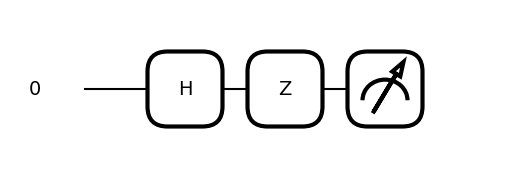

Calculons la valeur moyenne de l'opérateur  $ \langle Z \rangle $:


* $H|0\rangle = \frac{1}{\sqrt{2}} \left( |0 \rangle + |1 \rangle \right)$

* $Z \left( \frac{1}{\sqrt{2}} \left( |0\rangle + |1\rangle \right) \right) = \frac{1}{\sqrt{2}} \left( Z|0\rangle + Z|1\rangle \right) = \frac{1}{\sqrt{2}} \left( |0\rangle - |1\rangle \right)$

* La valeur moyenne d'un opérateur $( O )$ dans un état $|\psi\rangle$ est donnée par: $\langle O \rangle = \langle \psi | O | \psi \rangle$


* $\langle Z \rangle = \left\langle \frac{1}{\sqrt{2}} \left( |0\rangle - |1\rangle \right) \bigg| Z \bigg| \frac{1}{\sqrt{2}} \left( |0\rangle - |1\rangle \right) \right\rangle$

* Que l'on développe:
$\langle Z \rangle = \frac{1}{2} \left( \langle 0 | Z | 0 \rangle - \langle 0 | Z | 1 \rangle - \langle 1 | Z | 0 \rangle + \langle 1 | Z | 1 \rangle \right)$

* Substituons les effets de $Z$: $\langle Z \rangle =\frac{1}{2} \left( \langle 0 | 0 \rangle + 0 - 0 - \langle 1 | 1 \rangle \right)$
* Puisque $ \langle 0 | 0 \rangle = 1$ et $\langle 1 | 1 \rangle = 1 $:

* Nous obtenons finalement $\langle Z \rangle = \frac{1}{2} (1 - 1) = 0$


In [ ]:
dev = qml.device('default.qubit', wires = 1)
@qml.qnode(dev)
def circuit():
    ##################
    # YOUR CODE HERE #
    ##################
    
#print(circuit())

In [ ]:
#DO NOT EDIT THIS CELL
ans = Answer(dev, circuit)
grade(exercise_expval, ans)

Dans le dernier exercice vous avez calculé la valeur moyenne analytiquement. Sur du vrai matériel quantique, la nature probabiliste du calcul quantique nous force plutôt à faire des échantillonages répétés afin de calculer la valeur moyenne.

Considérez le même circuit mais testez le avec plusieurs nombre d'échantillons ('shots'). Quelles sont les valeurs possibles après un seul échantillonage? Que se passe-t-il quand vous augmentez le nombre d'échantillons?

In [ ]:
#Adapté du Codebook I.10.2
resultats = []

# Différentes nombre d'échantillonage
n_echantillons = [1, 100, 1000, 10000, 100000]
for n in n_echantillons:
    dev = qml.device('default.qubit', wires = 1, shots = n)
    @qml.qnode(dev)
    def circuit():
        qml.Hadamard(wires = 0)
        qml.Z(wires = 0)
        return qml.expval(qml.Z(wires = 0))
    resultats.append(circuit())

print(resultats)

## qml.counts

Un ordinateur quantique ne donne pas directement accès à l'état quantique complet d'un qubit (qml.state) ou aux valeurs moyennes des observables. Ces dernières sont uniquement accessibles sur simulateur. Sur un ordinateur quantique, nous obtenons les résultats de mesures sur plusieurs `shots` ce qui nous permet de construire une distrubution de résultats. 

On peut ensuite par post-traitement calculer les différentes métriques qui nous intéressent.

`qml.counts` est le point de départ lorsqu'on effectue une mesure sur un ordinateur quantique.

## Matrice de densité
  

Nous pourrions aussi être intéressés par l'obtention de la matrice de densité dans la base de calcul. Dans ce cas, nous pouvons utiliser `qml.density_matrix()`.

In [ ]:
@qml.qnode(dev)
def circuit_density_matrix(theta):
    qml.RX(theta, wires=0)
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.density_matrix(wires=0)

circuit_density_matrix(0.5)
